# 0. Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from joblib import dump, load
import pickle
from gensim.models import Word2Vec, FastText, KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# A. Data Preparation

In [2]:
df = pd.read_csv('spooky_cleaned.csv')
df.head()

,id,text,author,space_tokenized_text,stemmed_text
0,id26305,process however afforded means ascertaining di...,EAP,"['process', 'however', 'afforded', 'means', 'a...",process howev afford mean ascertain dimens dun...
1,id17569,never occurred fumbling might mere mistake,HPL,"['never', 'occurred', 'fumbling', 'might', 'me...",never occur fumbl might mere mistak
2,id11008,left hand gold snuff box capered hill cutting ...,EAP,"['left', 'hand', 'gold', 'snuff', 'box', 'cape...",left hand gold snuff box caper hill cut manner...
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS,"['lovely', 'spring', 'looked', 'windsor', 'ter...",love spring look windsor terrac sixteen fertil...
4,id12958,finding nothing else even gold superintendent ...,HPL,"['finding', 'nothing', 'else', 'even', 'gold',...",find noth els even gold superintend abandon at...


In [3]:
df.dropna(inplace=True)

# B. Encoding of the Target Variable

In [4]:
#Encode the labels using an encoding technique.
le = LabelEncoder()
df['author'] = le.fit_transform(df['author'])
df.head()


,id,text,author,space_tokenized_text,stemmed_text
0,id26305,process however afforded means ascertaining di...,0,"['process', 'however', 'afforded', 'means', 'a...",process howev afford mean ascertain dimens dun...
1,id17569,never occurred fumbling might mere mistake,1,"['never', 'occurred', 'fumbling', 'might', 'me...",never occur fumbl might mere mistak
2,id11008,left hand gold snuff box capered hill cutting ...,0,"['left', 'hand', 'gold', 'snuff', 'box', 'cape...",left hand gold snuff box caper hill cut manner...
3,id27763,lovely spring looked windsor terrace sixteen f...,2,"['lovely', 'spring', 'looked', 'windsor', 'ter...",love spring look windsor terrac sixteen fertil...
4,id12958,finding nothing else even gold superintendent ...,1,"['finding', 'nothing', 'else', 'even', 'gold',...",find noth els even gold superintend abandon at...


# C. Construction of Training and Testing Sets

In [5]:
X = df['stemmed_text']
y = df['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# D. Vectorization Methods


In [6]:
# 1. Use the lexical frequency method and one-hot encoding to vectorize the training and testing datasets.
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [7]:
# 2. Train a TF-IDF vectorization model on the training part and vectorize it.
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf = tfidf.transform(X_train)
# 3. Using the same model, vectorize the testing part.
X_test_tfidf = tfidf.transform(X_test)

# E. Training

In [27]:
model1 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='relu')
model2 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='logistic')
model3 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='tanh')

In [17]:
def train(vectorizer, model, epochs = 10):
    X = None
    y = None

    if vectorizer == 'cv':
        X = X_train_cv
        y = y_train
    elif vectorizer == 'tfidf':
        X = X_train_tfidf
        y = y_train
    else:
        raise ValueError("Invalid vectorizer")
    

    losses = []
    prev_accuracy = None 

    for epoch in range(epochs):
        model.partial_fit(X, y, classes=np.unique(y_train))

        y_train_pred = model.predict(X)

        accuracy = accuracy_score(y, y_train_pred)
        precision = precision_score(y, y_train_pred, average='weighted')
        recall = recall_score(y, y_train_pred, average='weighted')
        f1 = f1_score(y, y_train_pred, average='weighted')

        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        
        if prev_accuracy is not None:
            loss = accuracy - prev_accuracy
            losses.append(loss)
        prev_accuracy = accuracy
    
    dump(model, 'models/'+f"{model.activation}_{vectorizer}.joblib")

    return losses

In [29]:
vectorizers = ['cv', 'tfidf']
models = [model1, model2, model3]
losses = {}

In [32]:
for model in models:
    for vectorizer in vectorizers:
        print(f"Training model with {model.activation} activation functions and {vectorizer} vectorizer")
        loss = train(vectorizer, model, epochs=50)
        losses[f"{model.activation}_{vectorizer}"] = loss
        

Training model with relu activation functions and cv vectorizer
Epoch 1/50 - Accuracy: 0.8598, Precision: 0.8630, Recall: 0.8598, F1-score: 0.8597
Epoch 2/50 - Accuracy: 0.9336, Precision: 0.9348, Recall: 0.9336, F1-score: 0.9336
Epoch 3/50 - Accuracy: 0.9634, Precision: 0.9636, Recall: 0.9634, F1-score: 0.9635
Epoch 4/50 - Accuracy: 0.9771, Precision: 0.9774, Recall: 0.9771, F1-score: 0.9771
Epoch 5/50 - Accuracy: 0.9853, Precision: 0.9853, Recall: 0.9853, F1-score: 0.9853
Epoch 6/50 - Accuracy: 0.9899, Precision: 0.9900, Recall: 0.9899, F1-score: 0.9899
Epoch 7/50 - Accuracy: 0.9931, Precision: 0.9931, Recall: 0.9931, F1-score: 0.9931
Epoch 8/50 - Accuracy: 0.9958, Precision: 0.9959, Recall: 0.9958, F1-score: 0.9958
Epoch 9/50 - Accuracy: 0.9964, Precision: 0.9964, Recall: 0.9964, F1-score: 0.9964
Epoch 10/50 - Accuracy: 0.9972, Precision: 0.9972, Recall: 0.9972, F1-score: 0.9972
Epoch 11/50 - Accuracy: 0.9981, Precision: 0.9981, Recall: 0.9981, F1-score: 0.9981
Epoch 12/50 - Accurac

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50 - Accuracy: 0.4037, Precision: 0.4715, Recall: 0.4037, F1-score: 0.2325
Epoch 2/50 - Accuracy: 0.4845, Precision: 0.7695, Recall: 0.4845, F1-score: 0.3883
Epoch 3/50 - Accuracy: 0.8262, Precision: 0.8435, Recall: 0.8262, F1-score: 0.8256
Epoch 4/50 - Accuracy: 0.8586, Precision: 0.8654, Recall: 0.8586, F1-score: 0.8584
Epoch 5/50 - Accuracy: 0.8897, Precision: 0.8911, Recall: 0.8897, F1-score: 0.8897
Epoch 6/50 - Accuracy: 0.9094, Precision: 0.9112, Recall: 0.9094, F1-score: 0.9094
Epoch 7/50 - Accuracy: 0.9254, Precision: 0.9262, Recall: 0.9254, F1-score: 0.9254
Epoch 8/50 - Accuracy: 0.9388, Precision: 0.9389, Recall: 0.9388, F1-score: 0.9388
Epoch 9/50 - Accuracy: 0.9472, Precision: 0.9474, Recall: 0.9472, F1-score: 0.9473
Epoch 10/50 - Accuracy: 0.9556, Precision: 0.9556, Recall: 0.9556, F1-score: 0.9556
Epoch 11/50 - Accuracy: 0.9608, Precision: 0.9609, Recall: 0.9608, F1-score: 0.9608
Epoch 12/50 - Accuracy: 0.9653, Precision: 0.9656, Recall: 0.9653, F1-score: 0.9653
E

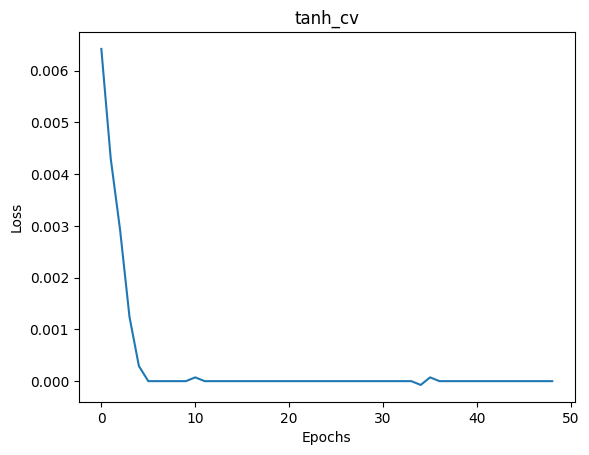

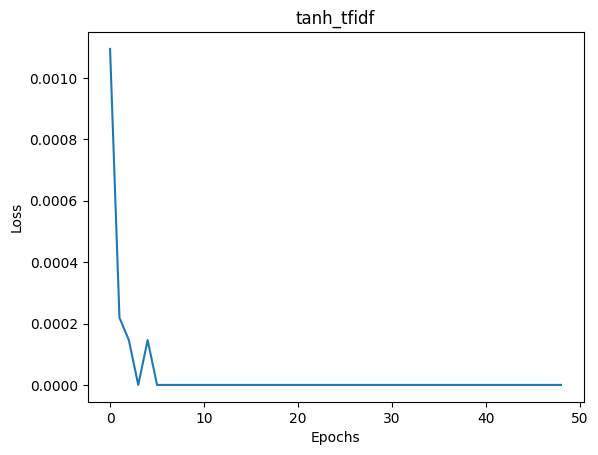

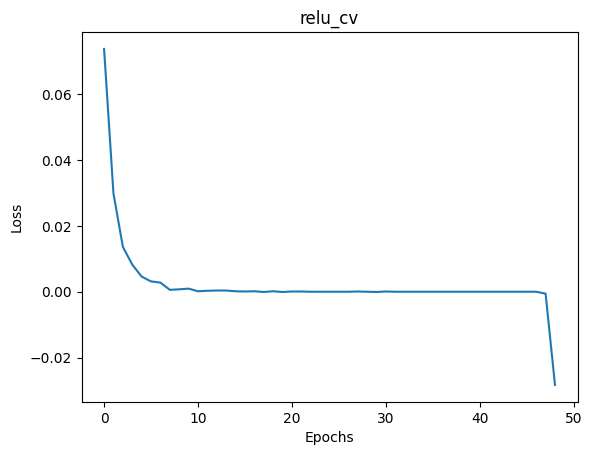

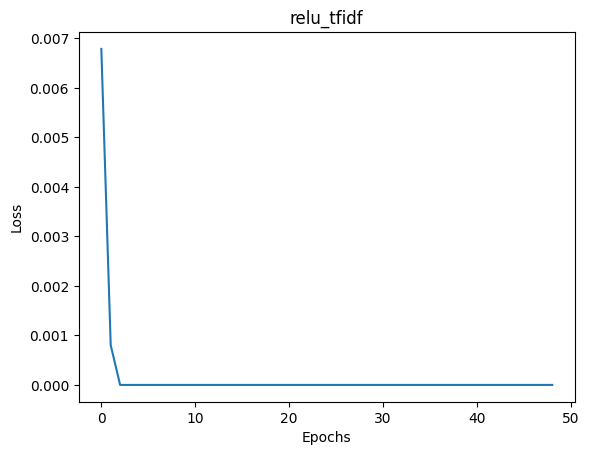

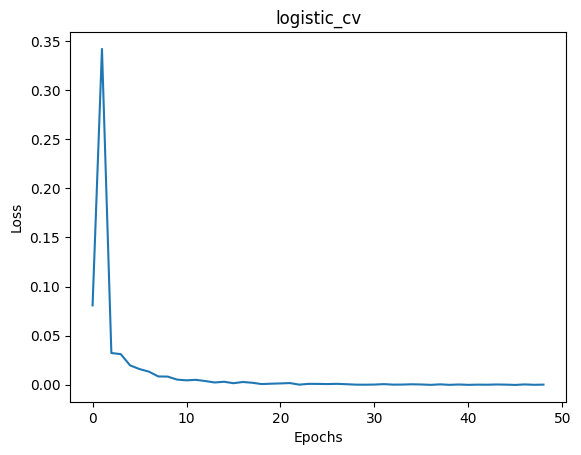

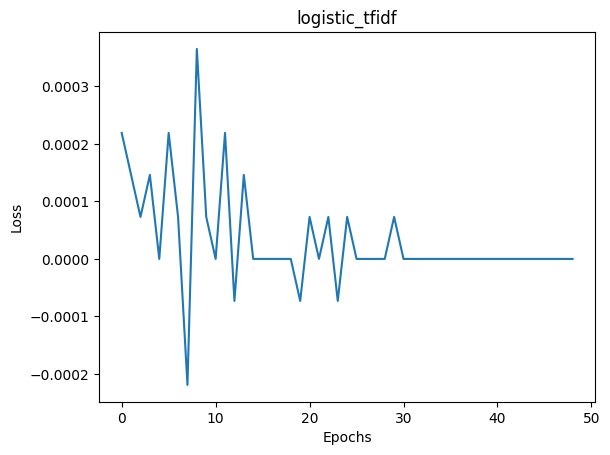

In [33]:
#plot the losses each in a different figure
for key, loss in losses.items():
    plt.figure()
    plt.plot(loss)
    plt.title(key)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


# F. Testing

In [36]:
#load the models from models folder and display the classification report for each model
X = None
#create a dataframe to store the accuracy, precision, recall, f1-score for each model
evaluation = pd.DataFrame(columns=['Model', 'Vectorizer', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

for model in models:
    for vectorizer in vectorizers:
        print(f"Model with {model.activation} activation function and {vectorizer} vectorizer")
        path = 'models/'+f'{model.activation}_{vectorizer}.joblib'
        clf = load(path)
        print(clf)
        if vectorizer == 'cv':
            X = X_test_cv
        elif vectorizer == 'tfidf':
            X = X_test_tfidf

        y_pred = clf.predict(X)
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        print('---------------------------------------------------')
        #save accuracy, precision, recall, f1-score in a dataframe
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        evaluation = evaluation.append({'Model': model.activation, 'Vectorizer': vectorizer, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}, ignore_index=True)

Model with relu activation function and cv vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
              precision    recall  f1-score   support

         EAP       0.71      0.83      0.77      2369
         HPL       0.80      0.71      0.75      1691
         MWS       0.78      0.69      0.73      1813

    accuracy                           0.75      5873
   macro avg       0.76      0.74      0.75      5873
weighted avg       0.76      0.75      0.75      5873

---------------------------------------------------
Model with relu activation function and tfidf vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
              precision    recall  f1-score   support

         EAP       0.76      0.79      0.77      2369
         HPL       0.78      0.73      0.76      1691
         MWS       0.76      0.76      0.76      1813

    accuracy                           0.76      5873
   macro avg       0.77      0.76      0.76      5873
weighted avg       0

In [37]:
evaluation

,Model,Vectorizer,Accuracy,Precision,Recall,F1-score
0,relu,cv,0.751405,0.756136,0.751405,0.750617
1,relu,tfidf,0.763834,0.764323,0.763834,0.763673
2,logistic,cv,0.771667,0.772280,0.771667,0.771728
3,logistic,tfidf,0.758386,0.758884,0.758386,0.758201
4,tanh,cv,0.739826,0.740088,0.739826,0.739812
5,tanh,tfidf,0.738805,0.739987,0.738805,0.738905


# G. Word Embedding

In [38]:
def vectorize(vectors, words):
    words = [word for word in words if word in vectors]
    if len(words) == 0:
        return np.zeros(50)
    return np.mean(vectors[words], axis=0)


In [39]:
# use Word2Vec to vectorize the training and testing datasets. (COW)
X_train_w2v_cbow = [word_tokenize(text) for text in X_train]
X_test_w2v_cbow = [word_tokenize(text) for text in X_test]

vectors = Word2Vec(X_train_w2v_cbow, vector_size=50, window=5, min_count=1, workers=4)

X_train_w2v_cbow = [vectorize(vectors.wv, sentence) for sentence in X_train_w2v_cbow]
X_test_w2v_cbow = [vectorize(vectors.wv, sentence) for sentence in X_test_w2v_cbow]

In [40]:
X_train_w2v_sg = [word_tokenize(text) for text in X_train]
X_test_w2v_sg = [word_tokenize(text) for text in X_test]

vectors = Word2Vec(X_train_w2v_sg, vector_size=50, window=5, min_count=1, workers=4, sg=1)

X_train_w2v_sg = [vectorize(vectors.wv, sentence) for sentence in X_train_w2v_sg]
X_test_w2v_sg = [vectorize(vectors.wv, sentence) for sentence in X_test_w2v_sg]

In [41]:
#use FastText
X_train_ft = [word_tokenize(text) for text in X_train]
X_test_ft = [word_tokenize(text) for text in X_test]

model = FastText(X_train_ft, vector_size=50, window=5, min_count=1, workers=4)

X_train_ft = [vectorize(model.wv, sentence) for sentence in X_train_ft]
X_test_ft = [vectorize(model.wv, sentence) for sentence in X_test_ft]

In [42]:
#use glove
X_train_gl = [word_tokenize(text) for text in X_train]
X_test_gl = [word_tokenize(text) for text in X_test]

glove = KeyedVectors.load_word2vec_format('glove.6B.50d.txt', binary=False, no_header=True)

X_train_glove = [vectorize(glove, sentence) for sentence in X_train_gl]
X_test_glove = [vectorize(glove, sentence) for sentence in X_test_gl]


In [45]:
def train(vectorizer, model, epochs = 10):
    X = None
    y = y_train

    if vectorizer == 'cv':
        X = X_train_cv
    elif vectorizer == 'tfidf':
        X = X_train_tfidf
    elif vectorizer == 'cbow':
        X = X_train_w2v_cbow
    elif vectorizer == 'sg':
        X = X_train_w2v_sg
    elif vectorizer == 'ft':
        X = X_train_ft
    elif vectorizer == 'gl':
        X = X_train_glove
    else:
        raise ValueError("Invalid vectorizer")
    

    losses = []
    prev_accuracy = None 

    for epoch in range(epochs):
        model.partial_fit(X, y, classes=np.unique(y_train))

        y_train_pred = model.predict(X)

        accuracy = accuracy_score(y, y_train_pred)
        precision = precision_score(y, y_train_pred, average='weighted')
        recall = recall_score(y, y_train_pred, average='weighted')
        f1 = f1_score(y, y_train_pred, average='weighted')

        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        
        if prev_accuracy is not None:
            loss = accuracy - prev_accuracy
            losses.append(loss)
        prev_accuracy = accuracy
    
    dump(model, 'models/'+f"{model.activation}_{vectorizer}.joblib")

    return losses

In [47]:
model1 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='relu')
model2 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='logistic')
model3 = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1, activation='tanh')

In [48]:
models = [model1, model2, model3]
vectorizers = ['cbow', 'sg', 'ft', 'gl']

In [49]:
for model in models:
    for vectorizer in vectorizers:
        print(f"Training model with {model.activation} hidden layers and {vectorizer} vectorizer")
        loss = train(vectorizer, model, 100)
        losses[f"{model.activation}_{vectorizer}"] = loss

Training model with relu hidden layers and cbow vectorizer


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/100 - Accuracy: 0.4034, Precision: 0.2400, Recall: 0.4034, F1-score: 0.2321
Epoch 2/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 4/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 6/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 7/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 8/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 9/100 - Accuracy: 0.3874, Precision: 0.2755, Recall: 0.3874, F1-score: 0.3220
Epoch 10/100 - Accuracy: 0.4035, Precision: 0.3171, Recall: 0.4035, F1-score: 0.2321


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 11/100 - Accuracy: 0.4036, Precision: 0.4715, Recall: 0.4036, F1-score: 0.2322
Epoch 12/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 13/100 - Accuracy: 0.4072, Precision: 0.2893, Recall: 0.4072, F1-score: 0.3280
Epoch 14/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 15/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 16/100 - Accuracy: 0.4054, Precision: 0.3510, Recall: 0.4054, F1-score: 0.2412


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 17/100 - Accuracy: 0.4194, Precision: 0.3408, Recall: 0.4194, F1-score: 0.2879
Epoch 18/100 - Accuracy: 0.4036, Precision: 0.3686, Recall: 0.4036, F1-score: 0.2323


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 19/100 - Accuracy: 0.4173, Precision: 0.3421, Recall: 0.4173, F1-score: 0.2837
Epoch 20/100 - Accuracy: 0.4061, Precision: 0.4451, Recall: 0.4061, F1-score: 0.2509
Epoch 21/100 - Accuracy: 0.4214, Precision: 0.3317, Recall: 0.4214, F1-score: 0.3032
Epoch 22/100 - Accuracy: 0.4058, Precision: 0.3646, Recall: 0.4058, F1-score: 0.2410


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 23/100 - Accuracy: 0.4249, Precision: 0.3027, Recall: 0.4249, F1-score: 0.3514
Epoch 24/100 - Accuracy: 0.4060, Precision: 0.5097, Recall: 0.4060, F1-score: 0.2457


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 25/100 - Accuracy: 0.4295, Precision: 0.3237, Recall: 0.4295, F1-score: 0.3314
Epoch 26/100 - Accuracy: 0.4270, Precision: 0.3080, Recall: 0.4270, F1-score: 0.3485
Epoch 27/100 - Accuracy: 0.4222, Precision: 0.4019, Recall: 0.4222, F1-score: 0.2974
Epoch 28/100 - Accuracy: 0.4118, Precision: 0.4648, Recall: 0.4118, F1-score: 0.2631
Epoch 29/100 - Accuracy: 0.4012, Precision: 0.4304, Recall: 0.4012, F1-score: 0.3391
Epoch 30/100 - Accuracy: 0.4404, Precision: 0.4560, Recall: 0.4404, F1-score: 0.3603
Epoch 31/100 - Accuracy: 0.4060, Precision: 0.4729, Recall: 0.4060, F1-score: 0.2426
Epoch 32/100 - Accuracy: 0.4173, Precision: 0.4853, Recall: 0.4173, F1-score: 0.3449
Epoch 33/100 - Accuracy: 0.4384, Precision: 0.4824, Recall: 0.4384, F1-score: 0.3606
Epoch 34/100 - Accuracy: 0.4385, Precision: 0.4206, Recall: 0.4385, F1-score: 0.3421
Epoch 35/100 - Accuracy: 0.4341, Precision: 0.4452, Recall: 0.4341, F1-score: 0.3638
Epoch 36/100 - Accuracy: 0.4425, Precision: 0.3898, Recall: 0.442

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 2/100 - Accuracy: 0.4015, Precision: 0.2408, Recall: 0.4015, F1-score: 0.2339


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/100 - Accuracy: 0.4025, Precision: 0.2437, Recall: 0.4025, F1-score: 0.2330
Epoch 4/100 - Accuracy: 0.4013, Precision: 0.2395, Recall: 0.4013, F1-score: 0.2340


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/100 - Accuracy: 0.4012, Precision: 0.2453, Recall: 0.4012, F1-score: 0.2347
Epoch 6/100 - Accuracy: 0.4020, Precision: 0.2395, Recall: 0.4020, F1-score: 0.2333
Epoch 7/100 - Accuracy: 0.4027, Precision: 0.4049, Recall: 0.4027, F1-score: 0.2332
Epoch 8/100 - Accuracy: 0.4012, Precision: 0.3250, Recall: 0.4012, F1-score: 0.2340
Epoch 9/100 - Accuracy: 0.4025, Precision: 0.3466, Recall: 0.4025, F1-score: 0.2333
Epoch 10/100 - Accuracy: 0.4018, Precision: 0.3303, Recall: 0.4018, F1-score: 0.2339
Epoch 11/100 - Accuracy: 0.3989, Precision: 0.3500, Recall: 0.3989, F1-score: 0.2391
Epoch 12/100 - Accuracy: 0.4020, Precision: 0.3482, Recall: 0.4020, F1-score: 0.2341
Epoch 13/100 - Accuracy: 0.4017, Precision: 0.3282, Recall: 0.4017, F1-score: 0.2335
Epoch 14/100 - Accuracy: 0.4025, Precision: 0.3559, Recall: 0.4025, F1-score: 0.2334
Epoch 15/100 - Accuracy: 0.4022, Precision: 0.3872, Recall: 0.4022, F1-score: 0.2330
Epoch 16/100 - Accuracy: 0.4018, Precision: 0.3132, Recall: 0.4018, F1

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 27/100 - Accuracy: 0.4011, Precision: 0.3353, Recall: 0.4011, F1-score: 0.2360
Epoch 28/100 - Accuracy: 0.3920, Precision: 0.3564, Recall: 0.3920, F1-score: 0.2846
Epoch 29/100 - Accuracy: 0.3997, Precision: 0.3379, Recall: 0.3997, F1-score: 0.2439
Epoch 30/100 - Accuracy: 0.3937, Precision: 0.3498, Recall: 0.3937, F1-score: 0.2621
Epoch 31/100 - Accuracy: 0.3995, Precision: 0.3399, Recall: 0.3995, F1-score: 0.2432
Epoch 32/100 - Accuracy: 0.3989, Precision: 0.3499, Recall: 0.3989, F1-score: 0.2482
Epoch 33/100 - Accuracy: 0.3951, Precision: 0.3369, Recall: 0.3951, F1-score: 0.2503
Epoch 34/100 - Accuracy: 0.3928, Precision: 0.3725, Recall: 0.3928, F1-score: 0.3291
Epoch 35/100 - Accuracy: 0.3961, Precision: 0.3384, Recall: 0.3961, F1-score: 0.2546
Epoch 36/100 - Accuracy: 0.4020, Precision: 0.3109, Recall: 0.4020, F1-score: 0.2342
Epoch 37/100 - Accuracy: 0.4011, Precision: 0.3058, Recall: 0.4011, F1-score: 0.2346
Epoch 38/100 - Accuracy: 0.3912, Precision: 0.3663, Recall: 0.391

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 6/100 - Accuracy: 0.4020, Precision: 0.2641, Recall: 0.4020, F1-score: 0.2378


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 7/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 8/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 9/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 10/100 - Accuracy: 0.3972, Precision: 0.3231, Recall: 0.3972, F1-score: 0.2647
Epoch 11/100 - Accuracy: 0.4016, Precision: 0.3217, Recall: 0.4016, F1-score: 0.2378
Epoch 12/100 - Accuracy: 0.4025, Precision: 0.3323, Recall: 0.4025, F1-score: 0.2362
Epoch 13/100 - Accuracy: 0.3979, Precision: 0.3066, Recall: 0.3979, F1-score: 0.2394
Epoch 14/100 - Accuracy: 0.3994, Precision: 0.2944, Recall: 0.3994, F1-score: 0.2381
Epoch 15/100 - Accuracy: 0.3963, Precision: 0.3154, Recall: 0.3963, F1-score: 0.2510
Epoch 16/100 - Accuracy: 0.3964, Precision: 0.3324, Recall: 0.3964, F1-score: 0.2552
Epoch 17/100 - Accuracy: 0.3959, Precision: 0.3192, Recall: 0.3959, F1-score: 0.2450
Epoch 18/100 - Accuracy: 0.3993, Precision: 0.3068, Recall: 0.3993, F1-score: 0.2388
Epoch 19/100 - Accuracy: 0.3990, Precision: 0.3079, Recall: 0.3990, F1-score: 0.2435
Epoch 20/100 - Accuracy: 0.3888, Precision: 0.3612, Recall: 0.3888

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 36/100 - Accuracy: 0.3998, Precision: 0.2621, Recall: 0.3998, F1-score: 0.2436
Epoch 37/100 - Accuracy: 0.3904, Precision: 0.3304, Recall: 0.3904, F1-score: 0.3029
Epoch 38/100 - Accuracy: 0.3901, Precision: 0.3592, Recall: 0.3901, F1-score: 0.3010
Epoch 39/100 - Accuracy: 0.3920, Precision: 0.3304, Recall: 0.3920, F1-score: 0.2983
Epoch 40/100 - Accuracy: 0.3960, Precision: 0.3338, Recall: 0.3960, F1-score: 0.2835
Epoch 41/100 - Accuracy: 0.3941, Precision: 0.3273, Recall: 0.3941, F1-score: 0.2479
Epoch 42/100 - Accuracy: 0.3956, Precision: 0.3193, Recall: 0.3956, F1-score: 0.2457
Epoch 43/100 - Accuracy: 0.3950, Precision: 0.3324, Recall: 0.3950, F1-score: 0.2763
Epoch 44/100 - Accuracy: 0.3978, Precision: 0.3335, Recall: 0.3978, F1-score: 0.2882
Epoch 45/100 - Accuracy: 0.3949, Precision: 0.3220, Recall: 0.3949, F1-score: 0.2491
Epoch 46/100 - Accuracy: 0.3951, Precision: 0.3312, Recall: 0.3951, F1-score: 0.2947
Epoch 47/100 - Accuracy: 0.3961, Precision: 0.3303, Recall: 0.396

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 49/100 - Accuracy: 0.4007, Precision: 0.2675, Recall: 0.4007, F1-score: 0.2435
Epoch 50/100 - Accuracy: 0.3912, Precision: 0.3436, Recall: 0.3912, F1-score: 0.2975
Epoch 51/100 - Accuracy: 0.3909, Precision: 0.3461, Recall: 0.3909, F1-score: 0.3095
Epoch 52/100 - Accuracy: 0.4000, Precision: 0.2803, Recall: 0.4000, F1-score: 0.2774
Epoch 53/100 - Accuracy: 0.3977, Precision: 0.3178, Recall: 0.3977, F1-score: 0.2518
Epoch 54/100 - Accuracy: 0.3993, Precision: 0.3288, Recall: 0.3993, F1-score: 0.2719


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 55/100 - Accuracy: 0.4014, Precision: 0.2723, Recall: 0.4014, F1-score: 0.2428
Epoch 56/100 - Accuracy: 0.3998, Precision: 0.3069, Recall: 0.3998, F1-score: 0.2818
Epoch 57/100 - Accuracy: 0.3975, Precision: 0.3329, Recall: 0.3975, F1-score: 0.2713
Epoch 58/100 - Accuracy: 0.3946, Precision: 0.3417, Recall: 0.3946, F1-score: 0.2601
Epoch 59/100 - Accuracy: 0.3944, Precision: 0.3654, Recall: 0.3944, F1-score: 0.2865


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 60/100 - Accuracy: 0.3998, Precision: 0.2766, Recall: 0.3998, F1-score: 0.2592


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 61/100 - Accuracy: 0.4024, Precision: 0.2857, Recall: 0.4024, F1-score: 0.2854


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 62/100 - Accuracy: 0.4001, Precision: 0.2755, Recall: 0.4001, F1-score: 0.2543


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 63/100 - Accuracy: 0.4028, Precision: 0.2742, Recall: 0.4028, F1-score: 0.2385


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 64/100 - Accuracy: 0.4001, Precision: 0.2824, Recall: 0.4001, F1-score: 0.2950


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 65/100 - Accuracy: 0.4023, Precision: 0.2852, Recall: 0.4023, F1-score: 0.2775


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 66/100 - Accuracy: 0.4005, Precision: 0.2776, Recall: 0.4005, F1-score: 0.2577


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 67/100 - Accuracy: 0.4018, Precision: 0.2844, Recall: 0.4018, F1-score: 0.2873


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 68/100 - Accuracy: 0.4028, Precision: 0.2864, Recall: 0.4028, F1-score: 0.2860


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 69/100 - Accuracy: 0.4006, Precision: 0.2838, Recall: 0.4006, F1-score: 0.2967


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 70/100 - Accuracy: 0.4025, Precision: 0.2860, Recall: 0.4025, F1-score: 0.2780


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 71/100 - Accuracy: 0.4028, Precision: 0.2867, Recall: 0.4028, F1-score: 0.2914


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 72/100 - Accuracy: 0.4018, Precision: 0.2845, Recall: 0.4018, F1-score: 0.2700


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 73/100 - Accuracy: 0.4025, Precision: 0.2868, Recall: 0.4025, F1-score: 0.2766


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 74/100 - Accuracy: 0.4037, Precision: 0.2865, Recall: 0.4037, F1-score: 0.3257


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 75/100 - Accuracy: 0.4017, Precision: 0.2858, Recall: 0.4017, F1-score: 0.3003


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 76/100 - Accuracy: 0.4014, Precision: 0.2853, Recall: 0.4014, F1-score: 0.3043


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 77/100 - Accuracy: 0.4017, Precision: 0.2850, Recall: 0.4017, F1-score: 0.2687


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 78/100 - Accuracy: 0.4028, Precision: 0.2879, Recall: 0.4028, F1-score: 0.2730


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 79/100 - Accuracy: 0.4038, Precision: 0.2891, Recall: 0.4038, F1-score: 0.2966


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 80/100 - Accuracy: 0.4050, Precision: 0.2932, Recall: 0.4050, F1-score: 0.2799


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 81/100 - Accuracy: 0.4036, Precision: 0.2887, Recall: 0.4036, F1-score: 0.3032


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 82/100 - Accuracy: 0.4051, Precision: 0.2915, Recall: 0.4051, F1-score: 0.2972


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 83/100 - Accuracy: 0.4074, Precision: 0.2965, Recall: 0.4074, F1-score: 0.2919


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 84/100 - Accuracy: 0.4046, Precision: 0.2935, Recall: 0.4046, F1-score: 0.2736


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 85/100 - Accuracy: 0.4052, Precision: 0.2962, Recall: 0.4052, F1-score: 0.2716


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 86/100 - Accuracy: 0.4049, Precision: 0.2968, Recall: 0.4049, F1-score: 0.2655


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 87/100 - Accuracy: 0.4076, Precision: 0.2975, Recall: 0.4076, F1-score: 0.2907


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 88/100 - Accuracy: 0.4088, Precision: 0.3009, Recall: 0.4088, F1-score: 0.2872


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 89/100 - Accuracy: 0.4090, Precision: 0.3012, Recall: 0.4090, F1-score: 0.2903


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 90/100 - Accuracy: 0.4085, Precision: 0.2955, Recall: 0.4085, F1-score: 0.3103
Epoch 91/100 - Accuracy: 0.4087, Precision: 0.4104, Recall: 0.4087, F1-score: 0.2970


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 92/100 - Accuracy: 0.4095, Precision: 0.2970, Recall: 0.4095, F1-score: 0.3132
Epoch 93/100 - Accuracy: 0.4105, Precision: 0.3744, Recall: 0.4105, F1-score: 0.2999


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 94/100 - Accuracy: 0.4059, Precision: 0.3057, Recall: 0.4059, F1-score: 0.2610
Epoch 95/100 - Accuracy: 0.4072, Precision: 0.4089, Recall: 0.4072, F1-score: 0.2671
Epoch 96/100 - Accuracy: 0.4130, Precision: 0.3020, Recall: 0.4130, F1-score: 0.3156
Epoch 97/100 - Accuracy: 0.4049, Precision: 0.4337, Recall: 0.4049, F1-score: 0.3083
Epoch 98/100 - Accuracy: 0.4063, Precision: 0.3126, Recall: 0.4063, F1-score: 0.2575


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 99/100 - Accuracy: 0.4144, Precision: 0.3081, Recall: 0.4144, F1-score: 0.3065
Epoch 100/100 - Accuracy: 0.4018, Precision: 0.4244, Recall: 0.4018, F1-score: 0.2590
Training model with logistic hidden layers and sg vectorizer
Epoch 1/100 - Accuracy: 0.4932, Precision: 0.5015, Recall: 0.4932, F1-score: 0.4850
Epoch 2/100 - Accuracy: 0.4973, Precision: 0.5078, Recall: 0.4973, F1-score: 0.4564
Epoch 3/100 - Accuracy: 0.5134, Precision: 0.5255, Recall: 0.5134, F1-score: 0.4834
Epoch 4/100 - Accuracy: 0.5178, Precision: 0.5306, Recall: 0.5178, F1-score: 0.4777
Epoch 5/100 - Accuracy: 0.5516, Precision: 0.5510, Recall: 0.5516, F1-score: 0.5498
Epoch 6/100 - Accuracy: 0.5504, Precision: 0.5623, Recall: 0.5504, F1-score: 0.5398
Epoch 7/100 - Accuracy: 0.5615, Precision: 0.5613, Recall: 0.5615, F1-score: 0.5532
Epoch 8/100 - Accuracy: 0.5732, Precision: 0.5731, Recall: 0.5732, F1-score: 0.5731
Epoch 9/100 - Accuracy: 0.5693, Precision: 0.5760, Recall: 0.5693, F1-score: 0.5605
Epoch 10/100

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/100 - Accuracy: 0.4025, Precision: 0.2107, Recall: 0.4025, F1-score: 0.2327


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/100 - Accuracy: 0.3957, Precision: 0.2449, Recall: 0.3957, F1-score: 0.2561


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/100 - Accuracy: 0.4033, Precision: 0.2039, Recall: 0.4033, F1-score: 0.2321


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/100 - Accuracy: 0.4036, Precision: 0.4506, Recall: 0.4036, F1-score: 0.2322


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 6/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 7/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 8/100 - Accuracy: 0.4034, Precision: 0.1628, Recall: 0.4034, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 9/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 10/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 11/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 12/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 13/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 14/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 15/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 16/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 17/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 18/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 19/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 21/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 22/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 23/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 24/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 25/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 26/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 27/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 28/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 29/100 - Accuracy: 0.4031, Precision: 0.3067, Recall: 0.4031, F1-score: 0.2322


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 30/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 31/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 32/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 33/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 34/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 35/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 36/100 - Accuracy: 0.4009, Precision: 0.2645, Recall: 0.4009, F1-score: 0.2416


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 37/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 38/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 39/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 40/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 41/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 42/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 43/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 44/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 45/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 46/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 47/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 48/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 49/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 50/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 51/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 52/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 53/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 54/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 55/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 56/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 57/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 58/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 59/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 60/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 61/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 62/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 63/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 64/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 65/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 66/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 67/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 68/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 69/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 70/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 71/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 72/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 73/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 74/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 75/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 76/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 77/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 78/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 79/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 80/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 81/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 82/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 83/100 - Accuracy: 0.4130, Precision: 0.3026, Recall: 0.4130, F1-score: 0.2948


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 84/100 - Accuracy: 0.4033, Precision: 0.2450, Recall: 0.4033, F1-score: 0.2322


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 85/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 86/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 87/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 88/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 89/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 90/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 91/100 - Accuracy: 0.4190, Precision: 0.2898, Recall: 0.4190, F1-score: 0.3403


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 92/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 93/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 94/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 95/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 96/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 97/100 - Accuracy: 0.4041, Precision: 0.2994, Recall: 0.4041, F1-score: 0.2393


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 98/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 99/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 100/100 - Accuracy: 0.4041, Precision: 0.3028, Recall: 0.4041, F1-score: 0.2367
Training model with logistic hidden layers and gl vectorizer
Epoch 1/100 - Accuracy: 0.3898, Precision: 0.3797, Recall: 0.3898, F1-score: 0.3347
Epoch 2/100 - Accuracy: 0.4017, Precision: 0.3869, Recall: 0.4017, F1-score: 0.3122
Epoch 3/100 - Accuracy: 0.4175, Precision: 0.4020, Recall: 0.4175, F1-score: 0.3292
Epoch 4/100 - Accuracy: 0.4290, Precision: 0.4051, Recall: 0.4290, F1-score: 0.3590
Epoch 5/100 - Accuracy: 0.4565, Precision: 0.4609, Recall: 0.4565, F1-score: 0.4218
Epoch 6/100 - Accuracy: 0.4691, Precision: 0.4794, Recall: 0.4691, F1-score: 0.4322
Epoch 7/100 - Accuracy: 0.4783, Precision: 0.4846, Recall: 0.4783, F1-score: 0.4525
Epoch 8/100 - Accuracy: 0.4950, Precision: 0.4939, Recall: 0.4950, F1-score: 0.4920
Epoch 9/100 - Accuracy: 0.5038, Precision: 0.5037, Recall: 0.5038, F1-score: 0.5013
Epoch 10/100 - Accuracy: 0.5151, Precision: 0.5131, Recall: 0.5151, F1-score: 0.5111
Epoch 11/100

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/100 - Accuracy: 0.3924, Precision: 0.2761, Recall: 0.3924, F1-score: 0.3173
Epoch 3/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/100 - Accuracy: 0.4035, Precision: 0.2863, Recall: 0.4035, F1-score: 0.2323
Epoch 5/100 - Accuracy: 0.3983, Precision: 0.3275, Recall: 0.3983, F1-score: 0.2557


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 6/100 - Accuracy: 0.4006, Precision: 0.2811, Recall: 0.4006, F1-score: 0.2707
Epoch 7/100 - Accuracy: 0.4041, Precision: 0.2895, Recall: 0.4041, F1-score: 0.2803
Epoch 8/100 - Accuracy: 0.4012, Precision: 0.2844, Recall: 0.4012, F1-score: 0.3037
Epoch 9/100 - Accuracy: 0.4024, Precision: 0.2853, Recall: 0.4024, F1-score: 0.3244


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 10/100 - Accuracy: 0.4029, Precision: 0.2888, Recall: 0.4029, F1-score: 0.2613
Epoch 11/100 - Accuracy: 0.4085, Precision: 0.2999, Recall: 0.4085, F1-score: 0.2872


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 12/100 - Accuracy: 0.4020, Precision: 0.2867, Recall: 0.4020, F1-score: 0.3346
Epoch 13/100 - Accuracy: 0.4146, Precision: 0.2966, Recall: 0.4146, F1-score: 0.3354


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 14/100 - Accuracy: 0.4138, Precision: 0.3178, Recall: 0.4138, F1-score: 0.2885
Epoch 15/100 - Accuracy: 0.4145, Precision: 0.3176, Recall: 0.4145, F1-score: 0.2935


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 16/100 - Accuracy: 0.4239, Precision: 0.3156, Recall: 0.4239, F1-score: 0.3270
Epoch 17/100 - Accuracy: 0.4082, Precision: 0.4137, Recall: 0.4082, F1-score: 0.2525
Epoch 18/100 - Accuracy: 0.4208, Precision: 0.4691, Recall: 0.4208, F1-score: 0.2985
Epoch 19/100 - Accuracy: 0.4147, Precision: 0.3478, Recall: 0.4147, F1-score: 0.2735


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20/100 - Accuracy: 0.4259, Precision: 0.4835, Recall: 0.4259, F1-score: 0.3539
Epoch 21/100 - Accuracy: 0.4163, Precision: 0.3482, Recall: 0.4163, F1-score: 0.2781


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 22/100 - Accuracy: 0.4425, Precision: 0.3982, Recall: 0.4425, F1-score: 0.3475
Epoch 23/100 - Accuracy: 0.4375, Precision: 0.4668, Recall: 0.4375, F1-score: 0.3409
Epoch 24/100 - Accuracy: 0.4302, Precision: 0.4433, Recall: 0.4302, F1-score: 0.3169
Epoch 25/100 - Accuracy: 0.4490, Precision: 0.4217, Recall: 0.4490, F1-score: 0.3707


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 26/100 - Accuracy: 0.4111, Precision: 0.3002, Recall: 0.4111, F1-score: 0.3348
Epoch 27/100 - Accuracy: 0.4441, Precision: 0.3987, Recall: 0.4441, F1-score: 0.3697
Epoch 28/100 - Accuracy: 0.4422, Precision: 0.4983, Recall: 0.4422, F1-score: 0.3737
Epoch 29/100 - Accuracy: 0.4258, Precision: 0.4952, Recall: 0.4258, F1-score: 0.3088
Epoch 30/100 - Accuracy: 0.4546, Precision: 0.4262, Recall: 0.4546, F1-score: 0.3679
Epoch 31/100 - Accuracy: 0.4531, Precision: 0.4605, Recall: 0.4531, F1-score: 0.4423
Epoch 32/100 - Accuracy: 0.4265, Precision: 0.5074, Recall: 0.4265, F1-score: 0.3157
Epoch 33/100 - Accuracy: 0.4515, Precision: 0.4958, Recall: 0.4515, F1-score: 0.3667
Epoch 34/100 - Accuracy: 0.4365, Precision: 0.5008, Recall: 0.4365, F1-score: 0.3496
Epoch 35/100 - Accuracy: 0.4362, Precision: 0.4992, Recall: 0.4362, F1-score: 0.3287
Epoch 36/100 - Accuracy: 0.4468, Precision: 0.5117, Recall: 0.4468, F1-score: 0.3757
Epoch 37/100 - Accuracy: 0.4506, Precision: 0.4686, Recall: 0.450

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 3/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 5/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 6/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 7/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 8/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320
Epoch 9/100 - Accuracy: 0.4035, Precision: 0.1628, Recall: 0.4035, F1-score: 0.2320


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 10/100 - Accuracy: 0.4035, Precision: 0.2657, Recall: 0.4035, F1-score: 0.2323
Epoch 11/100 - Accuracy: 0.4036, Precision: 0.3686, Recall: 0.4036, F1-score: 0.2323


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 12/100 - Accuracy: 0.4035, Precision: 0.2657, Recall: 0.4035, F1-score: 0.2323
Epoch 13/100 - Accuracy: 0.3967, Precision: 0.2785, Recall: 0.3967, F1-score: 0.3159


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 14/100 - Accuracy: 0.4020, Precision: 0.2617, Recall: 0.4020, F1-score: 0.2361
Epoch 15/100 - Accuracy: 0.3983, Precision: 0.2634, Recall: 0.3983, F1-score: 0.2565


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 16/100 - Accuracy: 0.3988, Precision: 0.2647, Recall: 0.3988, F1-score: 0.2549
Epoch 17/100 - Accuracy: 0.3975, Precision: 0.2833, Recall: 0.3975, F1-score: 0.3308


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 18/100 - Accuracy: 0.4015, Precision: 0.2618, Recall: 0.4015, F1-score: 0.2374
Epoch 19/100 - Accuracy: 0.3960, Precision: 0.2758, Recall: 0.3960, F1-score: 0.3033


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20/100 - Accuracy: 0.3987, Precision: 0.2641, Recall: 0.3987, F1-score: 0.2545
Epoch 21/100 - Accuracy: 0.3783, Precision: 0.3816, Recall: 0.3783, F1-score: 0.3715


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 22/100 - Accuracy: 0.4017, Precision: 0.2665, Recall: 0.4017, F1-score: 0.2385
Epoch 23/100 - Accuracy: 0.3971, Precision: 0.2673, Recall: 0.3971, F1-score: 0.2675


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 24/100 - Accuracy: 0.3968, Precision: 0.2779, Recall: 0.3968, F1-score: 0.3102
Epoch 25/100 - Accuracy: 0.3987, Precision: 0.2666, Recall: 0.3987, F1-score: 0.2594


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 26/100 - Accuracy: 0.3962, Precision: 0.2747, Recall: 0.3962, F1-score: 0.2967
Epoch 27/100 - Accuracy: 0.4012, Precision: 0.2638, Recall: 0.4012, F1-score: 0.2402


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 28/100 - Accuracy: 0.3954, Precision: 0.2724, Recall: 0.3954, F1-score: 0.2910
Epoch 29/100 - Accuracy: 0.4001, Precision: 0.2614, Recall: 0.4001, F1-score: 0.2458


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 30/100 - Accuracy: 0.3987, Precision: 0.2670, Recall: 0.3987, F1-score: 0.2597
Epoch 31/100 - Accuracy: 0.3983, Precision: 0.2649, Recall: 0.3983, F1-score: 0.2583
Epoch 32/100 - Accuracy: 0.3922, Precision: 0.3672, Recall: 0.3922, F1-score: 0.3326
Epoch 33/100 - Accuracy: 0.4015, Precision: 0.2678, Recall: 0.4015, F1-score: 0.2401


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 34/100 - Accuracy: 0.4009, Precision: 0.2608, Recall: 0.4009, F1-score: 0.2404
Epoch 35/100 - Accuracy: 0.3945, Precision: 0.2838, Recall: 0.3945, F1-score: 0.3285


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 36/100 - Accuracy: 0.3955, Precision: 0.2717, Recall: 0.3955, F1-score: 0.2882
Epoch 37/100 - Accuracy: 0.3993, Precision: 0.2646, Recall: 0.3993, F1-score: 0.2523


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 38/100 - Accuracy: 0.3961, Precision: 0.2711, Recall: 0.3961, F1-score: 0.2815
Epoch 39/100 - Accuracy: 0.3960, Precision: 0.2733, Recall: 0.3960, F1-score: 0.2921


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 40/100 - Accuracy: 0.3959, Precision: 0.2756, Recall: 0.3959, F1-score: 0.3013
Epoch 41/100 - Accuracy: 0.3977, Precision: 0.2828, Recall: 0.3977, F1-score: 0.3305


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 42/100 - Accuracy: 0.3982, Precision: 0.2668, Recall: 0.3982, F1-score: 0.2620
Epoch 43/100 - Accuracy: 0.4017, Precision: 0.2653, Recall: 0.4017, F1-score: 0.2378


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 44/100 - Accuracy: 0.3966, Precision: 0.2675, Recall: 0.3966, F1-score: 0.2693
Epoch 45/100 - Accuracy: 0.3953, Precision: 0.3692, Recall: 0.3953, F1-score: 0.3153


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 46/100 - Accuracy: 0.3956, Precision: 0.2711, Recall: 0.3956, F1-score: 0.2846
Epoch 47/100 - Accuracy: 0.3972, Precision: 0.2807, Recall: 0.3972, F1-score: 0.3266
Epoch 48/100 - Accuracy: 0.3978, Precision: 0.5603, Recall: 0.3978, F1-score: 0.2770
Epoch 49/100 - Accuracy: 0.3965, Precision: 0.4024, Recall: 0.3965, F1-score: 0.2832
Epoch 50/100 - Accuracy: 0.3985, Precision: 0.5567, Recall: 0.3985, F1-score: 0.2655
Epoch 51/100 - Accuracy: 0.3970, Precision: 0.5688, Recall: 0.3970, F1-score: 0.3282


C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 52/100 - Accuracy: 0.3980, Precision: 0.2675, Recall: 0.3980, F1-score: 0.2643
Epoch 53/100 - Accuracy: 0.3977, Precision: 0.5599, Recall: 0.3977, F1-score: 0.2777
Epoch 54/100 - Accuracy: 0.3956, Precision: 0.5585, Recall: 0.3956, F1-score: 0.2846
Epoch 55/100 - Accuracy: 0.3977, Precision: 0.5598, Recall: 0.3977, F1-score: 0.2776
Epoch 56/100 - Accuracy: 0.3968, Precision: 0.4072, Recall: 0.3968, F1-score: 0.2836
Epoch 57/100 - Accuracy: 0.3990, Precision: 0.5525, Recall: 0.3990, F1-score: 0.2551
Epoch 58/100 - Accuracy: 0.3958, Precision: 0.5604, Recall: 0.3958, F1-score: 0.2910
Epoch 59/100 - Accuracy: 0.4006, Precision: 0.5491, Recall: 0.4006, F1-score: 0.2438
Epoch 60/100 - Accuracy: 0.3977, Precision: 0.5598, Recall: 0.3977, F1-score: 0.2773
Epoch 61/100 - Accuracy: 0.3996, Precision: 0.5525, Recall: 0.3996, F1-score: 0.2521
Epoch 62/100 - Accuracy: 0.3960, Precision: 0.5601, Recall: 0.3960, F1-score: 0.2892
Epoch 63/100 - Accuracy: 0.3994, Precision: 0.5517, Recall: 0.399

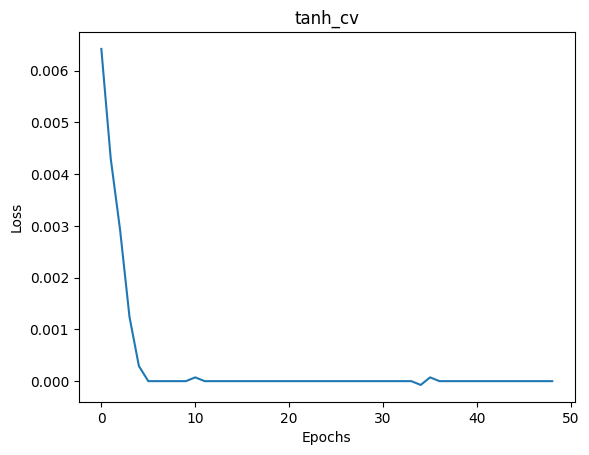

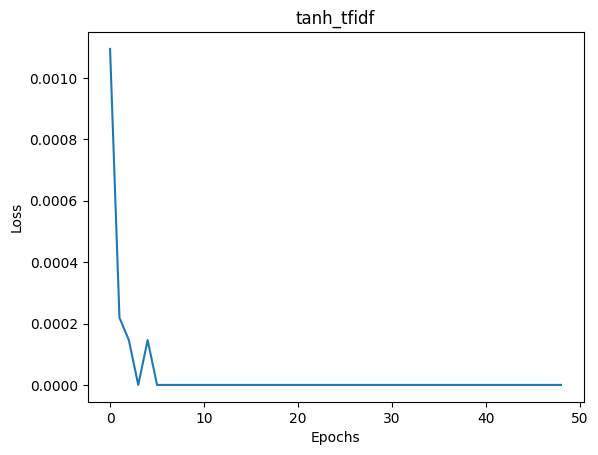

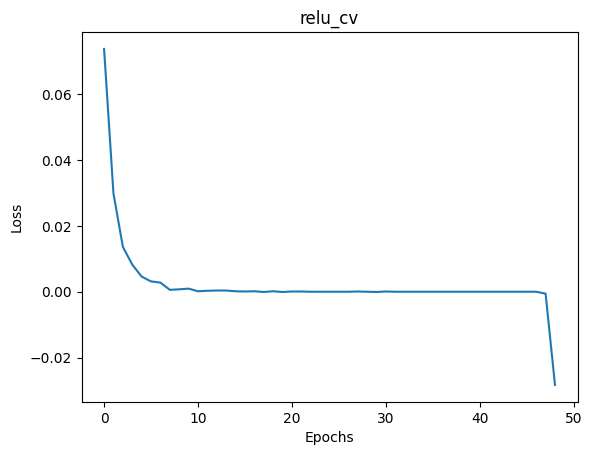

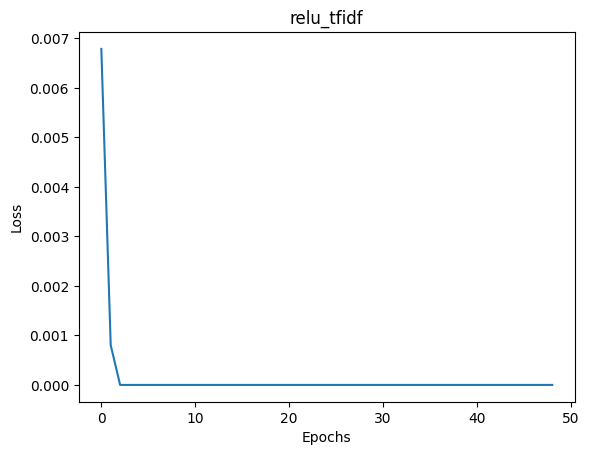

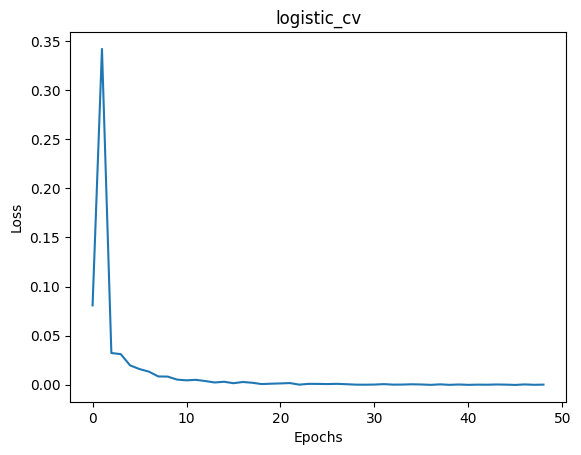

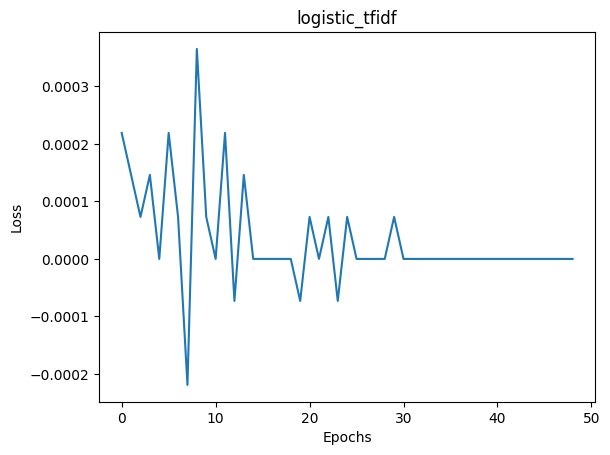

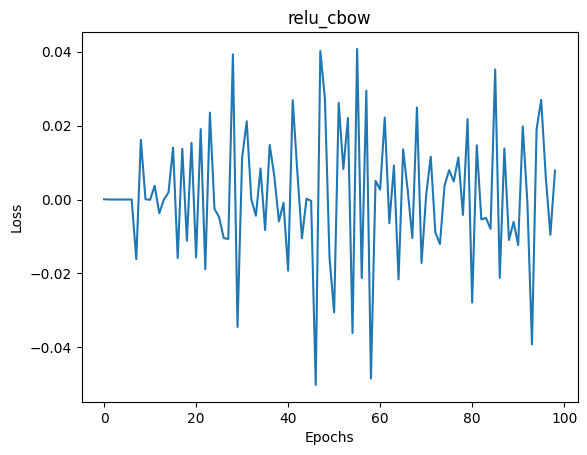

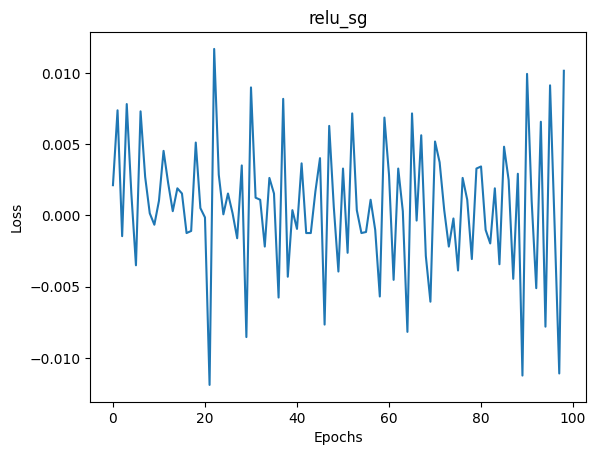

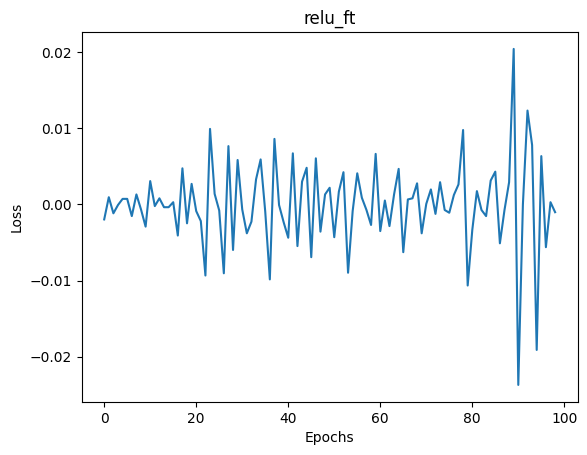

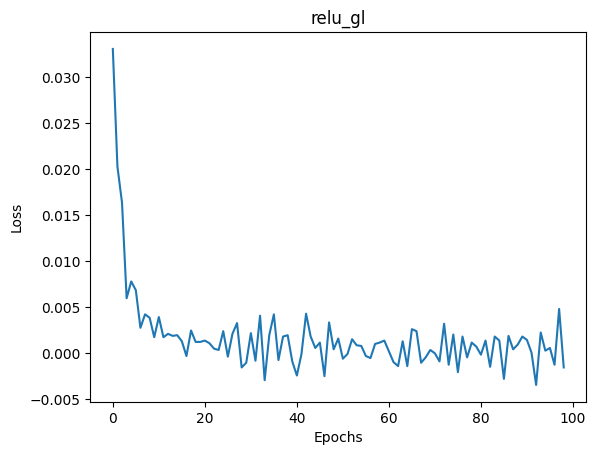

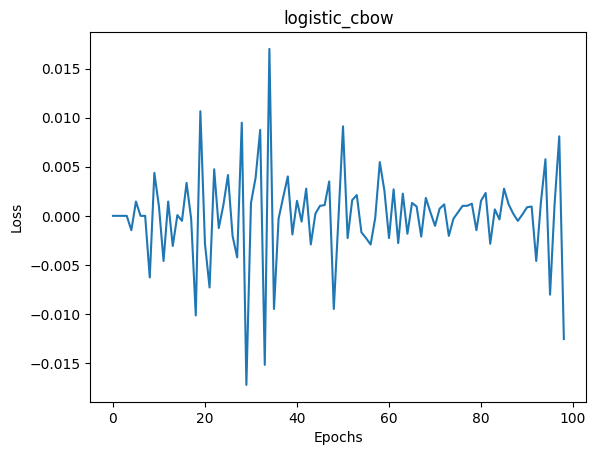

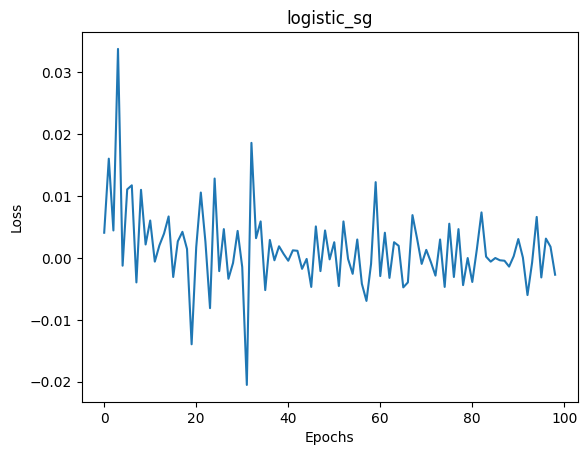

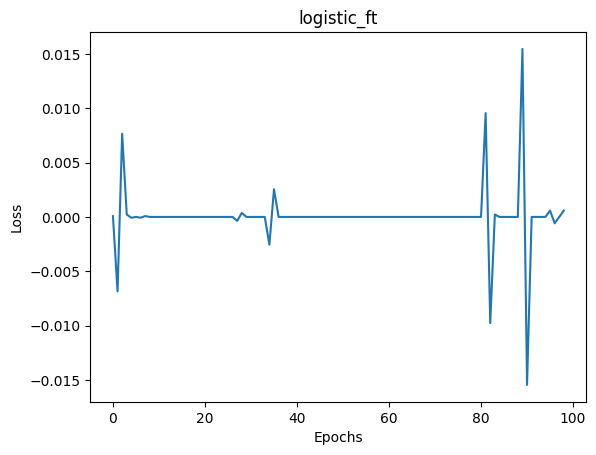

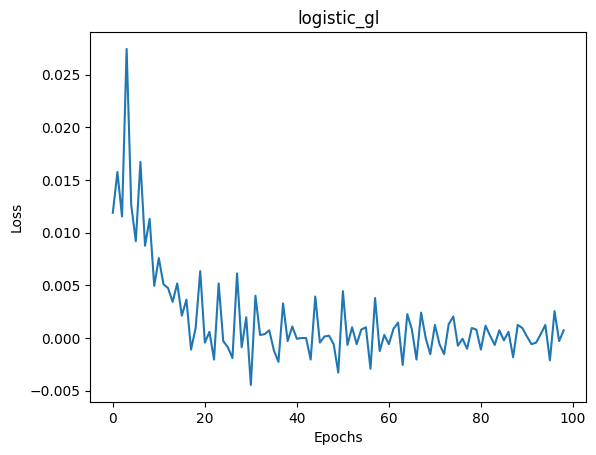

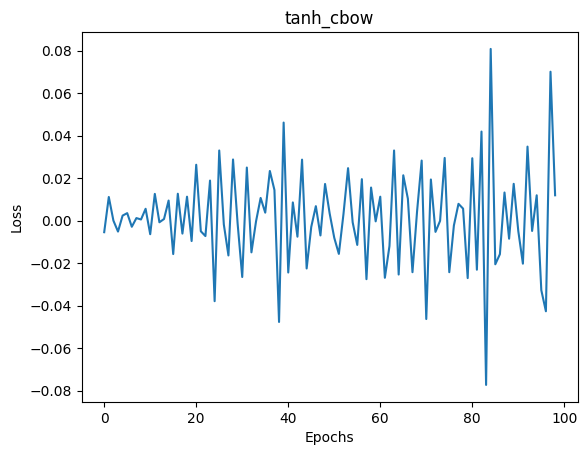

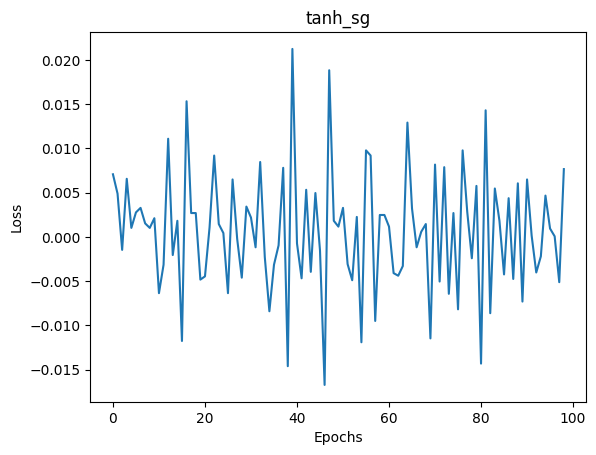

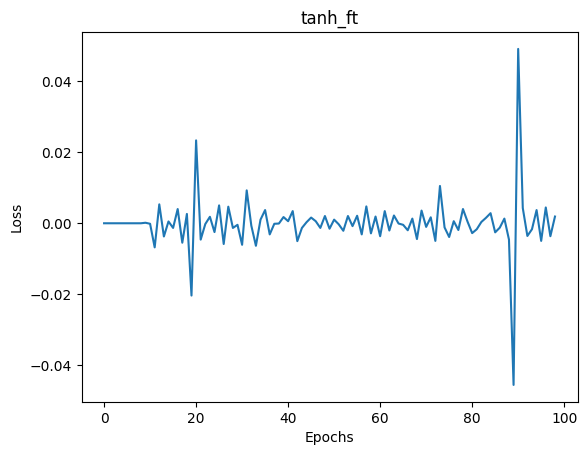

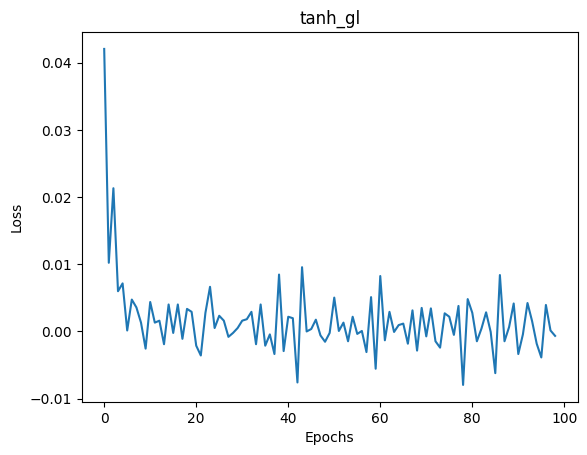

In [50]:
#plot the losses each in a different figure
for key, loss in losses.items():
    plt.figure()
    plt.plot(loss)
    plt.title(key)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [53]:
#load the models from models folder and display the classification report for each model
X = None
#create a dataframe to store the accuracy, precision, recall, f1-score for each model
evaluation = pd.DataFrame(columns=['Model', 'Vectorizer', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

for model in models:
    for vectorizer in vectorizers:
        print(f"Model with {model.activation} hidden layers and {vectorizer} vectorizer")
        path = 'models/'+f'{model.activation}_{vectorizer}.joblib'
        clf = load(path)
        print(clf)
        if vectorizer == 'cbow':
            X = X_test_w2v_cbow
        elif vectorizer == 'sg':
            X = X_test_w2v_sg
        elif vectorizer == 'ft':
            X = X_test_ft
        elif vectorizer == 'gl':
            X = X_test_glove
        else:
            raise ValueError("Invalid vectorizer")

        y_pred = clf.predict(X)
        #save accuracy, precision, recall, f1-score in a dataframe
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        evaluation = evaluation.append({'Model': model.activation, 'Vectorizer': vectorizer, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}, ignore_index=True)

Model with relu hidden layers and cbow vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
Model with relu hidden layers and sg vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
Model with relu hidden layers and ft vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
Model with relu hidden layers and gl vectorizer
MLPClassifier(hidden_layer_sizes=(32, 64), max_iter=1)
Model with logistic hidden layers and cbow vectorizer
MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 64), max_iter=1)
Model with logistic hidden layers and sg vectorizer
MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 64), max_iter=1)
Model with logistic hidden layers and ft vectorizer
MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 64), max_iter=1)
Model with logistic hidden layers and gl vectorizer
MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 64), max_iter=1)
Model with tanh hidden layers and cbow vectorizer
MLPClassifier(

C:\Users\Benya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
evaluation

,Model,Vectorizer,Accuracy,Precision,Recall,F1-score
0,relu,cbow,0.490039,0.509813,0.490039,0.472720
1,relu,sg,0.650604,0.651380,0.650604,0.650786
2,relu,ft,0.396561,0.406460,0.396561,0.260886
3,relu,gl,0.560531,0.559977,0.560531,0.559292
4,logistic,cbow,0.404223,0.431555,0.404223,0.262031
5,logistic,sg,0.625575,0.627517,0.625575,0.624826
6,logistic,ft,0.404904,0.335679,0.404904,0.237868
7,logistic,gl,0.570918,0.573939,0.570918,0.571613
8,tanh,cbow,0.509109,0.516222,0.509109,0.503290
9,tanh,sg,0.651967,0.652010,0.651967,0.651492
